In [ ]:
 # This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

from google.colab import drive
drive.mount('/content/drive')

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Mounted at /content/drive


# New section

# New section

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Import libraries and data
Libraries**

In [2]:
import numpy as np
import pandas as pd
from pathlib import Path
import shutil
import os
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
from PIL import Image

%matplotlib inline
warnings.filterwarnings('ignore')

**Data**

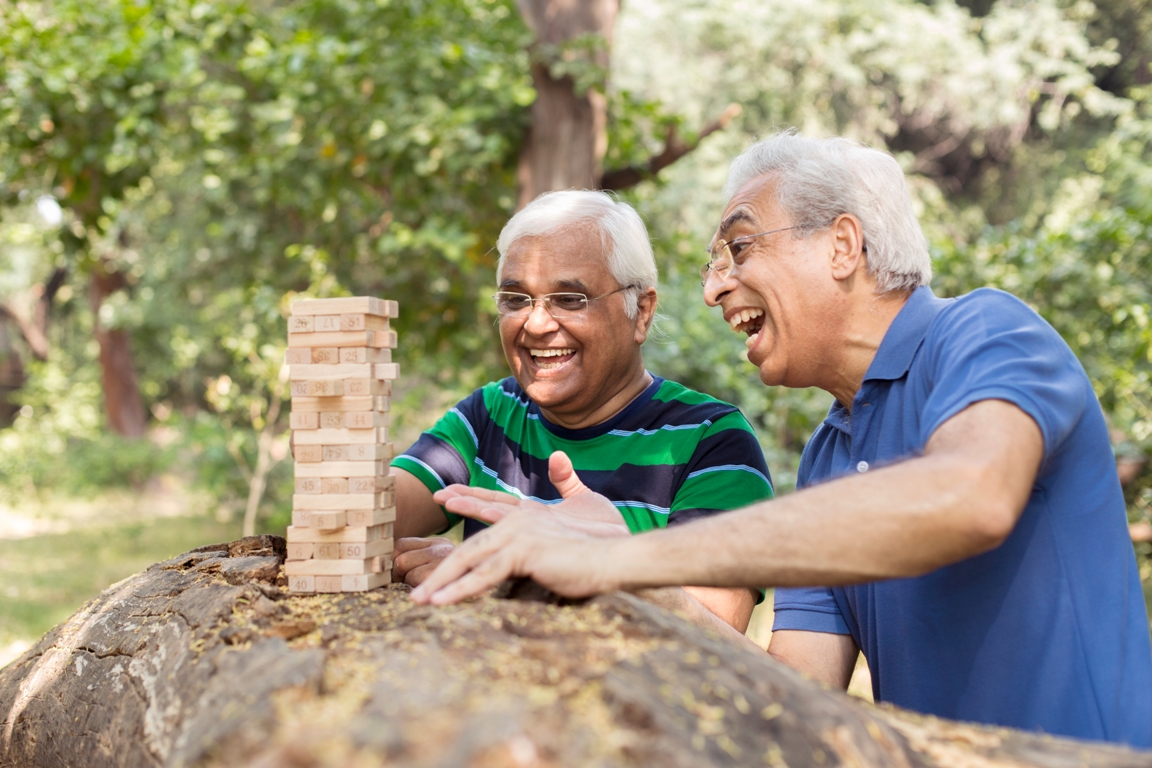

In [5]:
random_path = "/content/drive/MyDrive/data/Happy/10-Habits-of-Happy-People-Seniors-Today.jpg"
Image.open(random_path)

In [6]:
PATH = '/content/drive/MyDrive/data'

img_dir = Path(PATH)
files = list(img_dir.glob('**/*.jpg'))

In [7]:
# For illustration purpose
print(os.path.split(files[0]))
print(os.path.split(files[0])[0])
print(os.path.split(files[0])[0].split('/')[-1])

label = list(map(lambda x: os.path.split(x)[0].split('/')[-1], files))

('/content/drive/MyDrive/data/Happy', 'sample.jpg')
/content/drive/MyDrive/data/Happy
Happy


In [9]:
paths = pd.Series(files,name='Path').astype(str)
labels = pd.Series(label,name='Label')
df = pd.concat([paths,labels],axis=1)

display(df.head())
display(df.tail())
display(df.shape)

,Path,Label
0,/content/drive/MyDrive/data/Happy/sample.jpg,Happy
1,/content/drive/MyDrive/data/Happy/05-12-21-hap...,Happy
2,/content/drive/MyDrive/data/Happy/170404-happy...,Happy
3,/content/drive/MyDrive/data/Happy/10-Habits-of...,Happy
4,/content/drive/MyDrive/data/Happy/Happy.jpg,Happy


,Path,Label
127,/content/drive/MyDrive/data/Angry/single-angry...,Angry
128,/content/drive/MyDrive/data/Angry/getty_465251...,Angry
129,/content/drive/MyDrive/data/Angry/portrait-ang...,Angry
130,/content/drive/MyDrive/data/Angry/images15.jpg,Angry
131,/content/drive/MyDrive/data/Angry/shutterstock...,Angry


(132, 2)

**Splitting into train and test/validation sets**

In [10]:
from sklearn.model_selection import train_test_split
X_tr, X_val, y_tr, y_val = train_test_split(df.Path, df.Label, test_size = 0.2, shuffle = True, random_state = 42)
display(X_tr)
display(y_tr)

95     /content/drive/MyDrive/data/Angry/Anger_Contro...
96     /content/drive/MyDrive/data/Angry/GettyImages-...
0           /content/drive/MyDrive/data/Happy/sample.jpg
12     /content/drive/MyDrive/data/Happy/343515-world...
126    /content/drive/MyDrive/data/Angry/iStock_00001...
                             ...                        
71     /content/drive/MyDrive/data/Sad/depositphotos_...
106    /content/drive/MyDrive/data/Angry/angry-man-sh...
14     /content/drive/MyDrive/data/Happy/Successful-y...
92     /content/drive/MyDrive/data/Angry/Angry-man-sh...
102    /content/drive/MyDrive/data/Angry/How-To-Commu...
Name: Path, Length: 105, dtype: object

95     Angry
96     Angry
0      Happy
12     Happy
126    Angry
       ...  
71       Sad
106    Angry
14     Happy
92     Angry
102    Angry
Name: Label, Length: 105, dtype: object

**EDA**(exploratory data analysis)


In [11]:
df.Label.value_counts()

Happy    66
Angry    43
Sad      23
Name: Label, dtype: int64

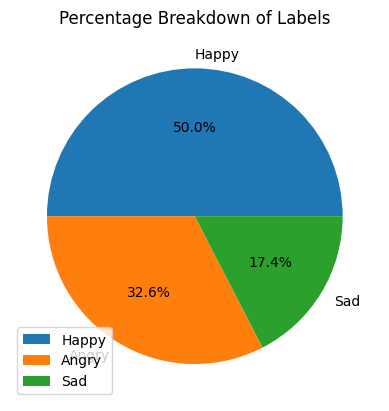

In [12]:
plt.pie(df.Label.value_counts().values, labels=df.Label.value_counts().index, autopct='%1.1f%%')
plt.legend(loc = 'lower left')
plt.title('Percentage Breakdown of Labels')
plt.show();

In [13]:
import random
random_paths = X_tr.sample(10)
random_img = [plt.imread(x) for x in random_paths]
random_img_dim = [x.shape for x in random_img]
random_img_dim

[(567, 756, 3),
 (310, 620, 3),
 (602, 802, 3),
 (560, 800, 3),
 (667, 1000, 3),
 (800, 1528, 3),
 (299, 400, 3),
 (1252, 1878, 3),
 (2000, 3000, 3),
 (491, 626, 3)]

The photos all come in different W x H dimensions, but color channels = 3 is consistent, we have to standardize the size further down the pipeline.

**TensorFlow**

Preparing the data

In [14]:
class_names = np.array(sorted([item.name for item in img_dir.glob('*')]))
class_names

array(['Angry', 'Happy', 'Sad'], dtype='<U5')

In [15]:
tr, val = pd.concat([X_tr, y_tr], axis = 1).reset_index(drop = True), pd.concat([X_val, y_val], axis = 1).reset_index(drop = True)
display(tr.head())
display(val.head())

,Path,Label
0,/content/drive/MyDrive/data/Angry/Anger_Contro...,Angry
1,/content/drive/MyDrive/data/Angry/GettyImages-...,Angry
2,/content/drive/MyDrive/data/Happy/sample.jpg,Happy
3,/content/drive/MyDrive/data/Happy/343515-world...,Happy
4,/content/drive/MyDrive/data/Angry/iStock_00001...,Angry


,Path,Label
0,/content/drive/MyDrive/data/Happy/images12.jpg,Happy
1,/content/drive/MyDrive/data/Sad/portrait-sad-m...,Sad
2,/content/drive/MyDrive/data/Happy/35438_hd.jpg,Happy
3,/content/drive/MyDrive/data/Happy/goup-happy-p...,Happy
4,/content/drive/MyDrive/data/Sad/39843138-sad-m...,Sad


In [16]:
import tensorflow as tf
from tensorflow.keras import layers
from keras.preprocessing.image import ImageDataGenerator

# data augmentation
train_datagen = ImageDataGenerator(rescale = 1./255,
                            rotation_range=0,
                            width_shift_range=0.2,
                            height_shift_range=0.2,
                            shear_range=0.2,
                            zoom_range=0.2,
                            horizontal_flip = True,
                            vertical_flip = True)

val_datagen = ImageDataGenerator(rescale = 1./255) #rescaling would do

train_data = train_datagen.flow_from_dataframe(dataframe = tr,
                                               x_col = 'Path',
                                               y_col = 'Label',
                                               batch_size = 32,
                                               target_size = (224, 224),
                                               shuffle = True,
                                               seed = 42,
                                               class_mode = 'categorical')

val_data = val_datagen.flow_from_dataframe(dataframe = val,
                                           x_col = 'Path',
                                           y_col = 'Label',
                                           batch_size = 32,
                                           target_size = (224, 224),
                                           shuffle = True,
                                           seed = 42,
                                           class_mode = 'categorical')

Found 105 validated image filenames belonging to 3 classes.
Found 27 validated image filenames belonging to 3 classes.


Perfect, we have sucessfully loaded in our images into tensorflow dataloaders which will allow for batching and fetching -> leading to more efficient workflows and pipelines.

**Basic model**

In [17]:
inputs = layers.Input(shape = (224, 224, 3), name = 'input_layer')
x = layers.Conv2D(filters = 5, kernel_size = 3, activation = 'relu')(inputs)
x = layers.Conv2D(filters = 5, kernel_size = 3, activation = 'relu')(x)
x = layers.MaxPool2D(2)(x)
x = layers.Conv2D(filters = 5, kernel_size = 3, activation = 'relu')(x)
x = layers.Conv2D(filters = 5, kernel_size = 3, activation = 'relu')(x)
x = layers.Flatten()(x)
x = layers.Dense(128, activation = 'relu')(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(3, activation = 'softmax')(x)
model_1 = tf.keras.Model(inputs, outputs)

model_1.compile(loss = 'categorical_crossentropy',
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ['accuracy'])

ckpt_path = 'model_checkpoints'
ckpt = tf.keras.callbacks.ModelCheckpoint(ckpt_path, save_best_only = True, save_weights_only = True)

In [18]:
history_1 = model_1.fit(train_data,
                        epochs = 10,
                        validation_data = val_data,
                        callbacks = [ckpt]
                        )

Epoch 1/10
4/4 [==============================] - 37s 8s/step - loss: 1.3893 - accuracy: 0.3524 - val_loss: 1.1666 - val_accuracy: 0.2222
Epoch 2/10
4/4 [==============================] - 12s 3s/step - loss: 1.0446 - accuracy: 0.4667 - val_loss: 0.8268 - val_accuracy: 0.6667
Epoch 3/10
4/4 [==============================] - 11s 3s/step - loss: 0.9742 - accuracy: 0.4571 - val_loss: 0.6806 - val_accuracy: 0.6667
Epoch 4/10
4/4 [==============================] - 10s 3s/step - loss: 0.9811 - accuracy: 0.4571 - val_loss: 0.7048 - val_accuracy: 0.6667
Epoch 5/10
4/4 [==============================] - 12s 2s/step - loss: 0.9906 - accuracy: 0.4571 - val_loss: 0.7703 - val_accuracy: 0.6667
Epoch 6/10
4/4 [==============================] - 10s 3s/step - loss: 0.9944 - accuracy: 0.4381 - val_loss: 0.8242 - val_accuracy: 0.6667
Epoch 7/10
4/4 [==============================] - 12s 4s/step - loss: 0.9891 - accuracy: 0.5238 - val_loss: 0.7841 - val_accuracy: 0.6667
Epoch 8/10
4/4 [==================

**Transfer learning with ResNetB0**

For EfficientNet architecture, image rescaling has already been built in, we opt to remove it in our ImageDataGenerator process.

In [19]:
# data augmentation
train_datagen = ImageDataGenerator(#rescale = 1./255,
                            rotation_range=0,
                            width_shift_range=0.2,
                            height_shift_range=0.2,
                            shear_range=0.2,
                            zoom_range=0.2,
                            horizontal_flip = True,
                            vertical_flip = True)

val_datagen = ImageDataGenerator()

train_data = train_datagen.flow_from_dataframe(dataframe = tr,
                                               x_col = 'Path',
                                               y_col = 'Label',
                                               batch_size = 32,
                                               target_size = (224, 224),
                                               shuffle = True,
                                               seed = 42,
                                               class_mode = 'categorical')

val_data = val_datagen.flow_from_dataframe(dataframe = val,
                                           x_col = 'Path',
                                           y_col = 'Label',
                                           batch_size = 32,
                                           target_size = (224, 224),
                                           shuffle = True,
                                           seed = 42,
                                           class_mode = 'categorical')

Found 105 validated image filenames belonging to 3 classes.
Found 27 validated image filenames belonging to 3 classes.


In [20]:
base_model = tf.keras.applications.efficientnet.EfficientNetB0(include_top=False)

16705208/16705208 [==============================] - 0s 0us/step


In [21]:
base_model.trainable = True

# Refreeze every layer except for the last 5
for layer in base_model.layers[:-5]:
    layer.trainable = False

In [22]:
inputs = layers.Input(shape = (224, 224, 3))
x = base_model(inputs, training = False)
x = layers.GlobalMaxPooling2D(name="global_average_pooling")(x)
outputs = layers.Dense(3, activation="softmax")(x)
model_2 = tf.keras.Model(inputs, outputs)

model_2.compile(loss = 'categorical_crossentropy',
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ['accuracy'])

In [23]:
history_2 = model_2.fit(train_data,
                       epochs = 10,
                       validation_data = val_data,
                       callbacks = [ckpt])

Epoch 1/10
4/4 [==============================] - 26s 4s/step - loss: 6.3785 - accuracy: 0.4095 - val_loss: 2.9946 - val_accuracy: 0.7037
Epoch 2/10
4/4 [==============================] - 14s 3s/step - loss: 4.3002 - accuracy: 0.6476 - val_loss: 1.5710 - val_accuracy: 0.6667
Epoch 3/10
4/4 [==============================] - 15s 5s/step - loss: 0.8407 - accuracy: 0.7905 - val_loss: 2.9692 - val_accuracy: 0.4444
Epoch 4/10
4/4 [==============================] - 14s 3s/step - loss: 1.2027 - accuracy: 0.7619 - val_loss: 0.7499 - val_accuracy: 0.8148
Epoch 5/10
4/4 [==============================] - 14s 4s/step - loss: 0.5954 - accuracy: 0.8762 - val_loss: 1.0422 - val_accuracy: 0.8148
Epoch 6/10
4/4 [==============================] - 14s 4s/step - loss: 0.4011 - accuracy: 0.9143 - val_loss: 2.3291 - val_accuracy: 0.6667
Epoch 7/10
4/4 [==============================] - 15s 3s/step - loss: 0.4501 - accuracy: 0.9238 - val_loss: 2.1047 - val_accuracy: 0.6296
Epoch 8/10
4/4 [==================

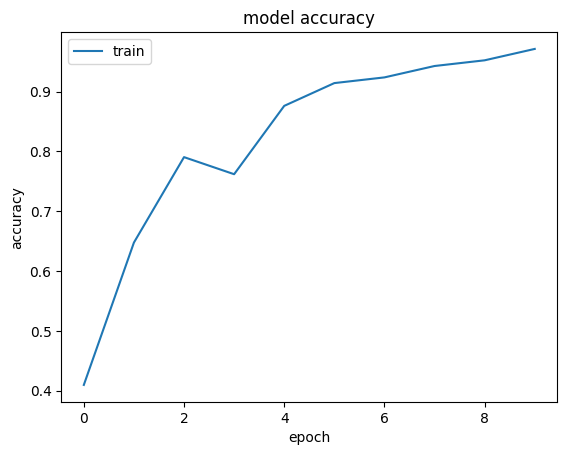

In [24]:
plt.plot(history_2.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'],loc='upper left')
plt.show()

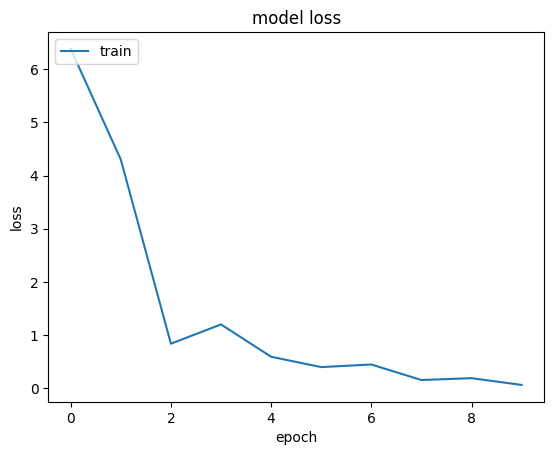

In [25]:
plt.plot(history_2.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'],loc='upper left')
plt.show()

In [26]:
!wget https://www.allprodad.com/wp-content/uploads/2021/03/05-12-21-happy-people.jpg

--2023-11-17 03:44:00--  https://www.allprodad.com/wp-content/uploads/2021/03/05-12-21-happy-people.jpg
Resolving www.allprodad.com (www.allprodad.com)... 104.26.8.139, 104.26.9.139, 172.67.71.3, ...
Connecting to www.allprodad.com (www.allprodad.com)|104.26.8.139|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 97317 (95K) [image/jpeg]
Saving to: ‘05-12-21-happy-people.jpg’

05-12-21-happy-peop 100%[===================>]  95.04K  --.-KB/s    in 0.008s  

2023-11-17 03:44:01 (11.5 MB/s) - ‘05-12-21-happy-people.jpg’ saved [97317/97317]



In [27]:
def load_and_prep_image(filename, img_shape=224):
    img = tf.io.read_file(filename)
    img = tf.image.decode_image(img, channels=3)
    img = tf.image.resize(img, size = [img_shape, img_shape])
    return img

In [28]:
test_photo_path = '/content/drive/MyDrive/data/Happy/05-12-21-happy-people.jpg'
test_photo = load_and_prep_image(test_photo_path)
test_photo.shape

TensorShape([224, 224, 3])

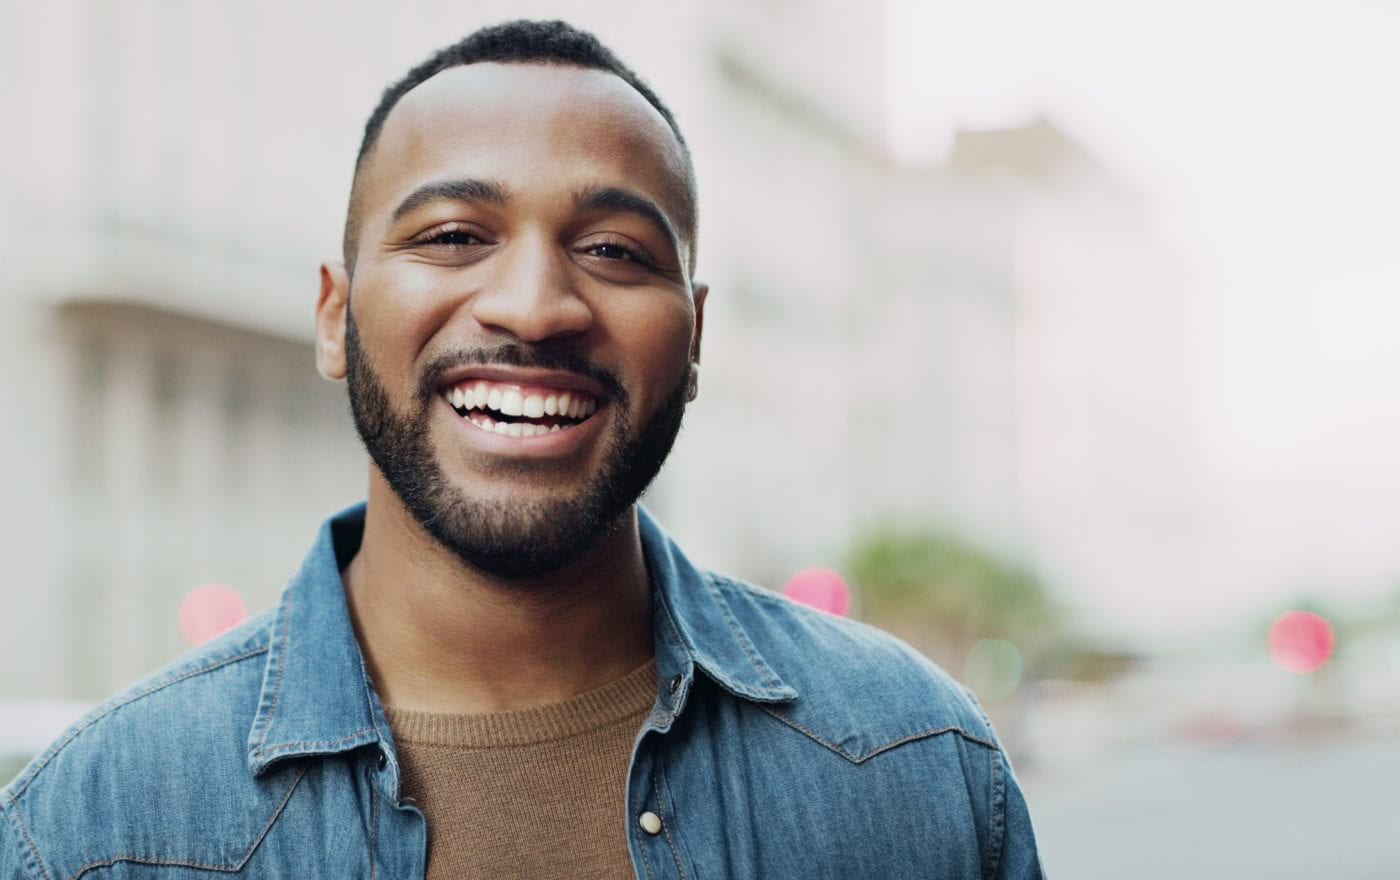

In [29]:
Image.open(test_photo_path)

In [30]:
class_names[tf.argmax(model_2.predict(tf.expand_dims(test_photo, 0)), axis = 1)]

1/1 [==============================] - 2s 2s/step


array(['Happy'], dtype='<U5')

Model prediction is accurate.Accuracy of the model is 95%.